# Audieo Experiments

Configs:
1. MODALILTIES: "AUD"
1. AUD_HIDDEN_LAYERS: 1

In [1]:
import os
os.chdir("../")
os.getcwd()

'/Users/zhaowendan/Documents/CSE 676 Deep Learning/hate_video_ classification/CSE676-Deep-Learning-Final-Project'

In [2]:
import warnings
import pickle
warnings.filterwarnings('ignore')
import warnings
from data_preprocessing.multimodal_datasets import MultimodalDataset
from models.multimodal_model import MultimodalClassifier
from training.test_model_multimodal import test_model_multimodal
from utils.utils import load_config, fix_the_random
import pickle
from training.evaluation import get_metric_by_epoch, plot_all_metrics, save_results

In [3]:
model_name = "Audio_baseline"

config = load_config('configs/configs.yaml')
fix_the_random(2021)

# load k-fold indexes
with open(config["PICKLE_FOLDER"] +'allFoldDetails.p', 'rb') as fp:
    allDataAnnotation = pickle.load(fp)

model_cls = MultimodalClassifier

dataset_cls = MultimodalDataset

In [4]:
performance_by_epoch, best_mean_metrics, best_std_metrics = test_model_multimodal(
    model_cls=model_cls,
    dataset_cls=dataset_cls,
    epochs=config["EPOCHS"],
    optimizer_name="Adam",
    allDataAnnotation=allDataAnnotation
)

100%|██████████| 5/5 [00:08<00:00,  1.63s/it]


In [5]:
with open(config["PICKLE_FOLDER"] + f"{model_name}_scores.p", "wb") as f:
    pickle.dump((performance_by_epoch, best_mean_metrics, best_std_metrics), f)

## Model Evaluation

In [6]:
with open(config["PICKLE_FOLDER"] + f"{model_name}_scores.p", "rb") as f:
    performance_by_epoch, best_mean_metrics, best_std_metrics = pickle.load(f)

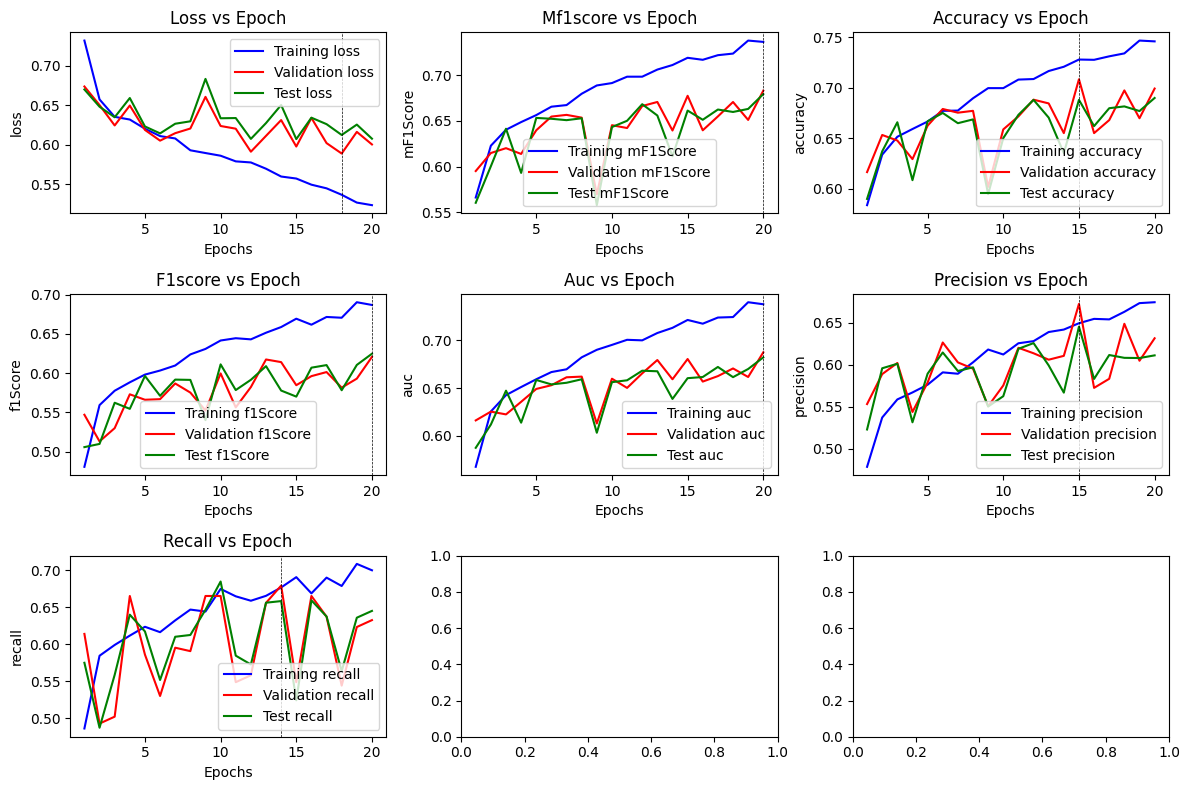

In [7]:
plot_all_metrics(performance_by_epoch)

In [9]:
save_results(performance_by_epoch, model_name)

Results saved successfully!
